## Getting ready

In this section, we will compare and contrast two different activation functions: sigmoid and ReLU.

## How to do it...

In [6]:
# Import the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)
np.random.seed(42)

In [16]:
# Declare batch size, model variables, and data model inputs
batch_size = 50
x = np.random.normal(2, 0.1, 500)
x_data = tf.keras.Input(shape=(1,))
a1 = tf.Variable(tf.random.normal(shape=[1, 1], seed=5))
b1 = tf.Variable(tf.random.uniform(shape=[1, 1], seed=5))
a2 = tf.Variable(tf.random.normal(shape=[1, 1], seed=5))
b2 = tf.Variable(tf.random.uniform(shape=[1, 1], seed=5))

In [12]:
# Declare the sigmoid and ReLU activation models as follows:
class MyCustomGateSigmoid(tf.keras.layers.Layer):
    
    def __init__(self, units, a1, b1):
        super(MyCustomGateSigmoid, self).__init__()
        self.units = units
        self.a1 = a1
        self.b1 = b1
        
    # Compute f(x) = sigmoid(a1 + x + b1)
    def call(self, inputs):
        return tf.math.sigmoid(inputs * self.a1 + self.b1)
    
# Add a layer which computes f(x) = sigmoid(a1 * x + b1)
my_custom_gate_sigmoid = MyCustomGateSigmoid(units=1, a1=a1, b1=b1)
output_sigmoid = my_custom_gate_sigmoid(x_data)

# Build the model
model_sigmoid = tf.keras.Model(inputs=x_data, outputs=output_sigmoid, name="gate_sigmoid")

class MyCustomGateRelu(tf.keras.layers.Layer):
    
    def __init__(self, units, a2, b2):
        super(MyCustomGateRelu, self).__init__()
        self.units = units
        self.a2 = a2
        self.b2 = b2
        
    # Compute f(x) = relu(a2 * x + b2)
    def call(self, inputs):
        return tf.nn.relu(inputs * self.a2 + self.b2)
    
# Add a layer which computes f(x) = relu(a2 * x + b2)
my_custom_gate_relu = MyCustomGateRelu(units=1, a2=a2, b2=b2)
outputs_relu = my_custom_gate_relu(x_data)

# Build the model
model_relu = tf.keras.Model(inputs=x_data, outputs=outputs_relu, name="gate_relu")

In [13]:
# Declare optimization algorithm
optimizer=tf.keras.optimizers.SGD(0.01)

In [19]:
# Loop through training for 750 iteration for both models. 
# Loss function will be average L2 norm between model output and value of 0.75
loss_vec_sigmoid = []
loss_vec_relu = []

activation_sigmoid = []
activation_relu = []

for i in range(500):
    
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    # Open a GradientTape
    with tf.GradientTape(persistent=True) as tape:
        
        # Forward pass.
        output_sigmoid = model_sigmoid(x_vals)
        output_relu = model_relu(x_vals)
        
        # Loss value as the difference between the output and a target value, 0.75
        loss_sigmoid = tf.reduce_mean(tf.square(tf.subtract(output_sigmoid, 0.75)))
        loss_vec_sigmoid.append(loss_sigmoid)
        loss_relu = tf.reduce_mean(tf.square(tf.subtract(output_relu, 0.75)))
        loss_vec_relu.append(loss_relu)
        
    # Get gradients of loss_sigmoid with reference to the variables "a1" and "b1" to adjust
    gradients_a1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.a1)
    gradients_b1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.b1)
    
    # Get gradients of loss_relu with reference to the variables "a2" and "b2" to adjust
    gradients_a2 = tape.gradient(loss_relu, my_custom_gate_relu.a2)
    gradients_b2 = tape.gradient(loss_relu, my_custom_gate_relu.b2)
    
    # Update the variables "a1" and "b1" of the model
    optimizer.apply_gradients(zip([gradients_a1, gradients_b1], [my_custom_gate_sigmoid.a1, my_custom_gate_sigmoid.b1]))
    
    # Update the variables "a2" and "b2" of the model
    optimizer.apply_gradients(zip([gradients_a2, gradients_b2], [my_custom_gate_relu.a2, my_custom_gate_relu.b2]))
    
    output_sigmoid = model_sigmoid(x_vals)
    output_relu = model_relu(x_vals)
    
    activation_sigmoid.append(np.mean(output_sigmoid))
    activation_relu.append(np.mean(output_relu))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(output_sigmoid)) + ' relu = ' + str(np.mean(output_relu)))

sigmoid = 0.5943172 relu = 0.75084627
sigmoid = 0.6327382 relu = 0.7511134
sigmoid = 0.6596761 relu = 0.7507398
sigmoid = 0.679226 relu = 0.7499596
sigmoid = 0.6941942 relu = 0.7528675
sigmoid = 0.7050888 relu = 0.75134677
sigmoid = 0.71367717 relu = 0.75109047
sigmoid = 0.720386 relu = 0.7519781
sigmoid = 0.7258277 relu = 0.7500313
sigmoid = 0.7301913 relu = 0.74972975


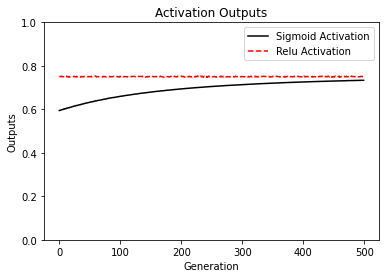

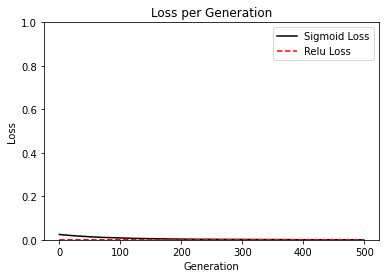

In [20]:
# To plot the loss and activation outputs, we need to input the following code:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation') 
plt.plot(activation_relu, 'r--', label='Relu Activation') 
plt.ylim([0, 1.0]) 
plt.title('Activation Outputs') 
plt.xlabel('Generation') 
plt.ylabel('Outputs') 
plt.legend(loc='upper right') 
plt.show() 
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss') 
plt.plot(loss_vec_relu, 'r--', label='Relu Loss') 
plt.ylim([0, 1.0]) 
plt.title('Loss per Generation') 
plt.xlabel('Generation') 
plt.ylabel('Loss') 
plt.legend(loc='upper right') 
plt.show() 